# Time Series Analysis of the San Antonio Metro Area

Author: Melody Bass

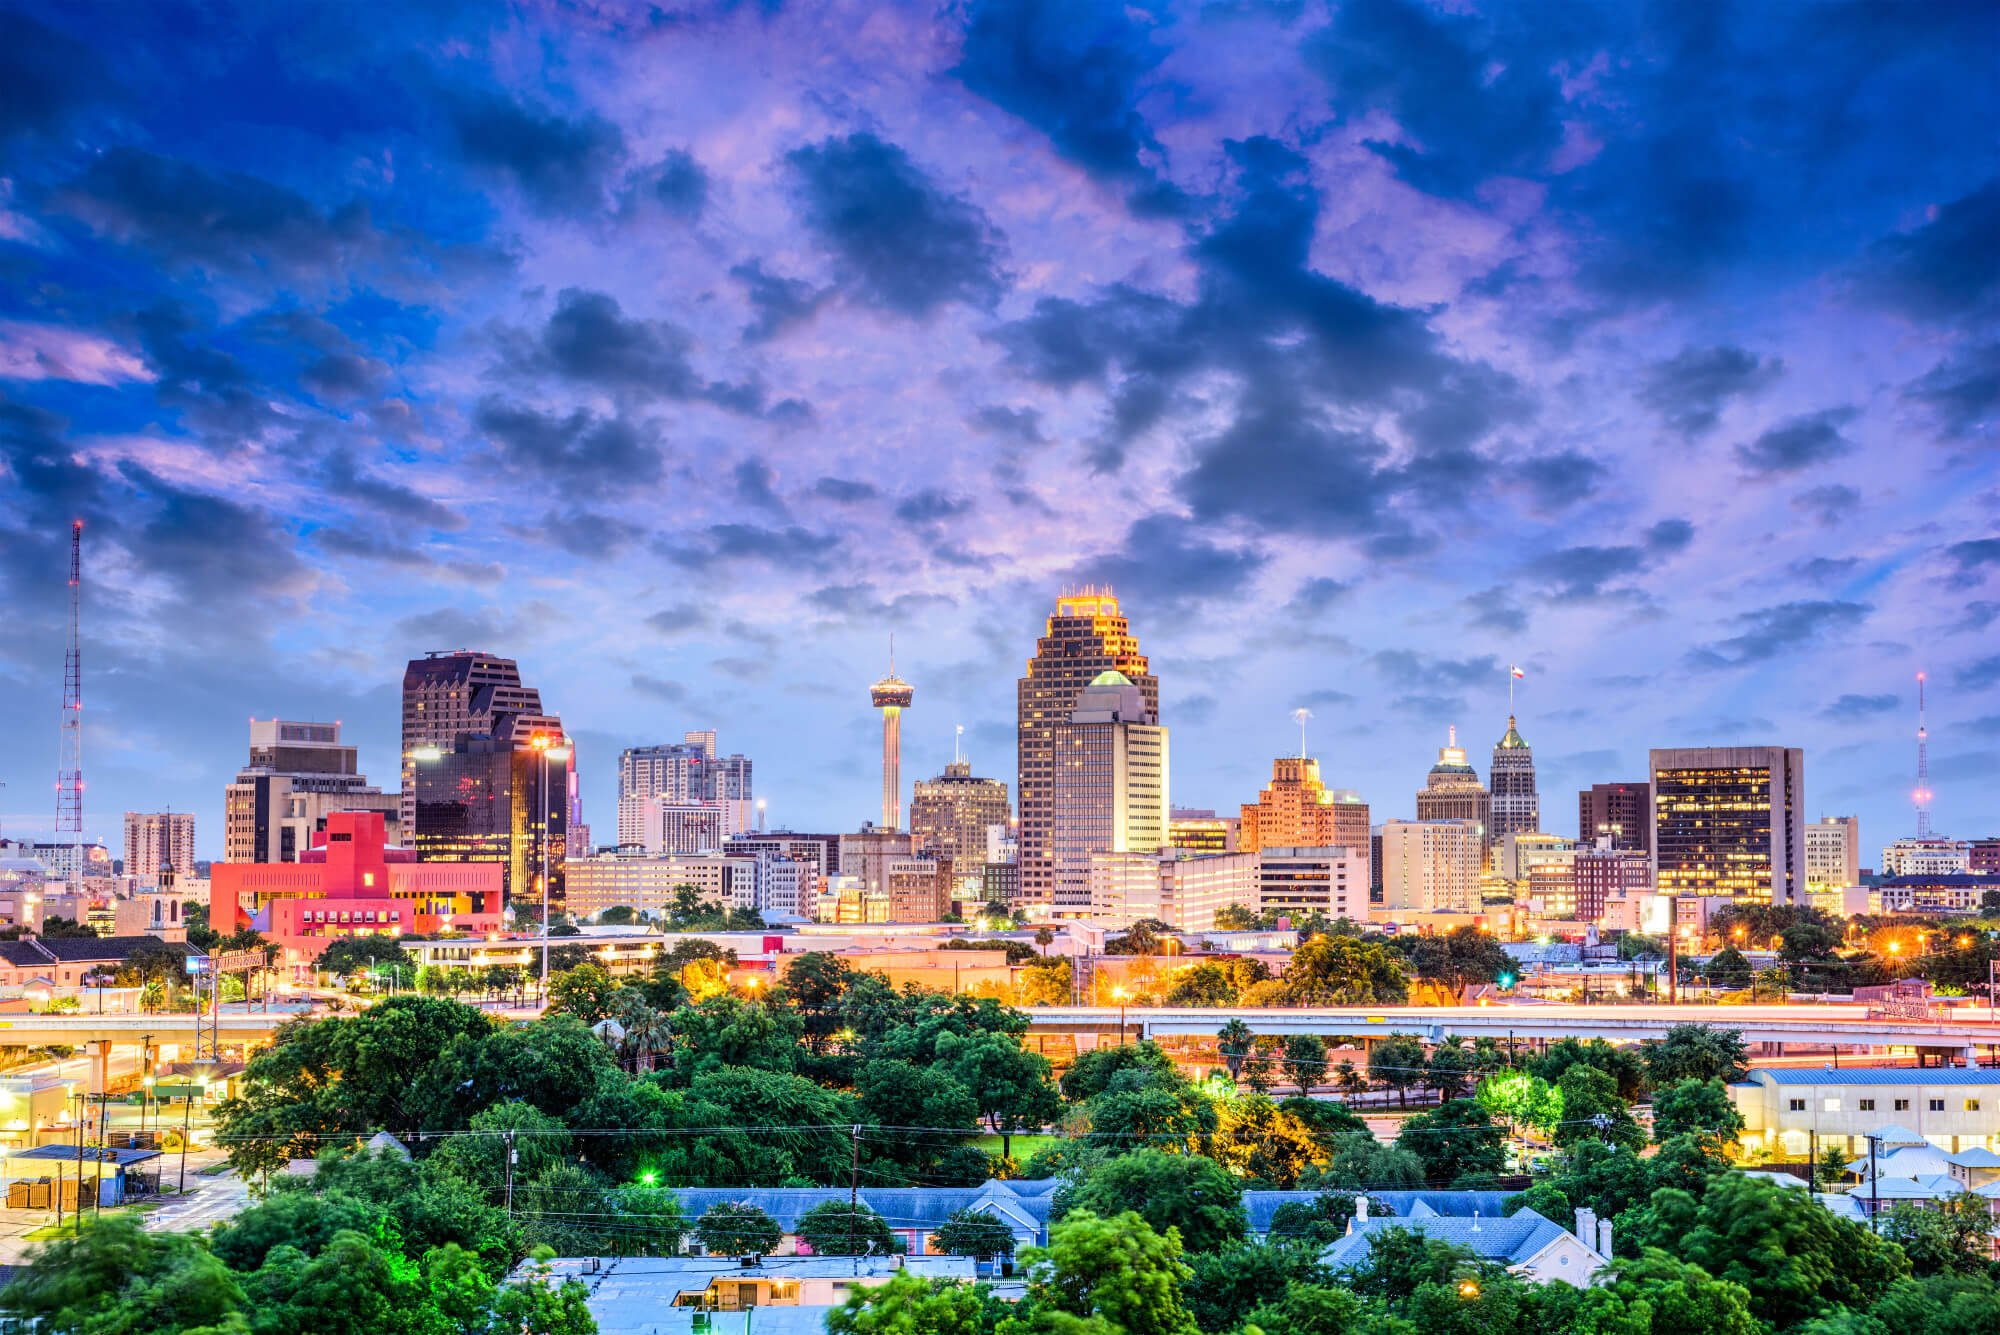

## Overview

## Business Problem

## Data Understanding

In [1]:
# Basics
import pandas as pd
import numpy as np
import itertools

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams
import time

# Modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

In [2]:
# load in zillow home price data as df
df = pd.read_csv('data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
df['Metro'].value_counts()

New York                          779
Los Angeles-Long Beach-Anaheim    347
Chicago                           325
Philadelphia                      281
Washington                        249
                                 ... 
Ketchikan                           1
Eagle Pass                          1
Dodge City                          1
Emporia                             1
Sheridan                            1
Name: Metro, Length: 701, dtype: int64

In [4]:
#Dataframe containing only zips from San Antonio metro

sa_df = df[df['Metro']=='San Antonio']
sa_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,92271,78130,New Braunfels,TX,San Antonio,Comal,32,123900.0,123900.0,123800.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,92341,78245,San Antonio,TX,San Antonio,Bexar,72,89200.0,89100.0,88900.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,92345,78249,San Antonio,TX,San Antonio,Bexar,343,117900.0,117800.0,117800.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,92347,78251,San Antonio,TX,San Antonio,Bexar,432,105000.0,104600.0,104200.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,92359,78263,China Grove,TX,San Antonio,Bexar,11468,118800.0,118800.0,118800.0,...,231900,232900,234300,234400,233200,232700,233600,235700,239400,242400
12561,92268,78123,McQueeney,TX,San Antonio,Guadalupe,12562,189600.0,189600.0,189400.0,...,313400,317200,321000,321400,318800,319100,322900,326900,331700,335700
13442,92283,78147,Poth,TX,San Antonio,Wilson,13443,63800.0,63800.0,63900.0,...,135800,136700,138000,139300,140700,141400,140900,139900,139400,139500
13893,92231,78056,Mico,TX,San Antonio,Medina,13894,178500.0,178500.0,178400.0,...,373500,374500,379200,376800,362200,345400,336400,331100,328300,326600


In [5]:
sa_df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000
mean,92313.269231,78202.974359,4915.756410,118574.358974,118574.358974,118598.717949,118637.179487,118705.128205,118792.307692,118919.230769,...,209450.000000,210360.256410,211416.666667,212305.128205,212937.179487,213852.564103,214932.051282,216239.74359,217925.641026,219064.102564
std,69.915473,116.316739,3837.418925,67589.352954,67681.105645,67779.498286,67900.471679,68040.171285,68190.565233,68377.591943,...,106328.023148,106260.242091,106536.563343,106827.188885,106929.405173,107045.249231,107329.535633,107601.17358,107794.259823,107723.665205
min,92193.000000,78003.000000,32.000000,36100.000000,36100.000000,36200.000000,36200.000000,36300.000000,36400.000000,36500.000000,...,74800.000000,75700.000000,75900.000000,74600.000000,72500.000000,71300.000000,70700.000000,71200.00000,72600.000000,73700.000000
25%,92283.250000,78147.250000,1334.000000,62450.000000,62450.000000,62550.000000,62625.000000,62625.000000,62625.000000,62700.000000,...,128800.000000,131700.000000,132900.000000,132900.000000,132375.000000,132475.000000,133625.000000,135525.00000,137375.000000,138600.000000
50%,92316.500000,78220.500000,4422.500000,101400.000000,101350.000000,101300.000000,101200.000000,101100.000000,101050.000000,101000.000000,...,184050.000000,184700.000000,185350.000000,186100.000000,186550.000000,187050.000000,187850.000000,189000.00000,191550.000000,193050.000000
75%,92342.500000,78246.500000,7801.000000,154200.000000,154125.000000,154150.000000,154300.000000,154375.000000,154100.000000,153925.000000,...,265825.000000,266125.000000,266550.000000,267475.000000,268625.000000,270375.000000,272400.000000,274075.00000,277075.000000,282100.000000
max,92715.000000,78861.000000,14175.000000,404800.000000,406300.000000,407800.000000,409300.000000,410800.000000,412200.000000,413600.000000,...,599800.000000,600600.000000,602600.000000,606100.000000,608800.000000,611000.000000,613400.000000,614600.00000,614500.000000,612600.000000


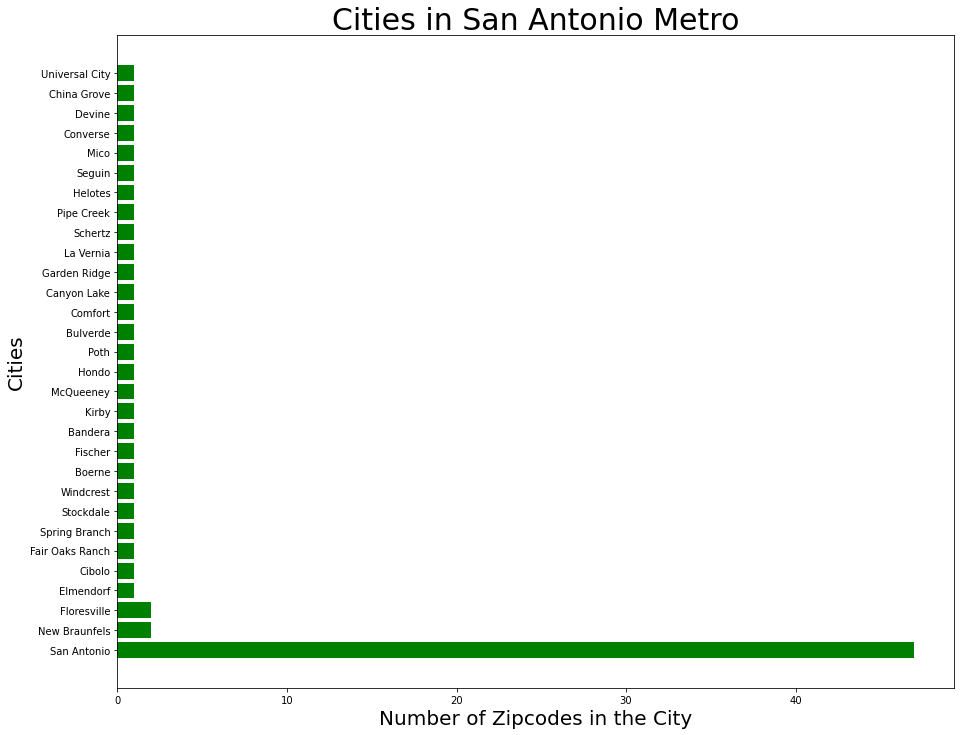

In [6]:
#Visualizing the value counts of zipcodes in each city in the San Antonio metro area


fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in sa_df['City'].value_counts()]

x = [a for a in sa_df['City'].value_counts().keys()]

ax.barh(x,y,color='green')
ax.set_title('Cities in San Antonio Metro',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of Zipcodes in the City',fontsize=20);

## Data Cleaning

In [7]:
# Create copy of df to calculate ROIs
roi_df = sa_df.copy()
roi_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,92271,78130,New Braunfels,TX,San Antonio,Comal,32,123900.0,123900.0,123800.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,92341,78245,San Antonio,TX,San Antonio,Bexar,72,89200.0,89100.0,88900.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,92345,78249,San Antonio,TX,San Antonio,Bexar,343,117900.0,117800.0,117800.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,92347,78251,San Antonio,TX,San Antonio,Bexar,432,105000.0,104600.0,104200.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000


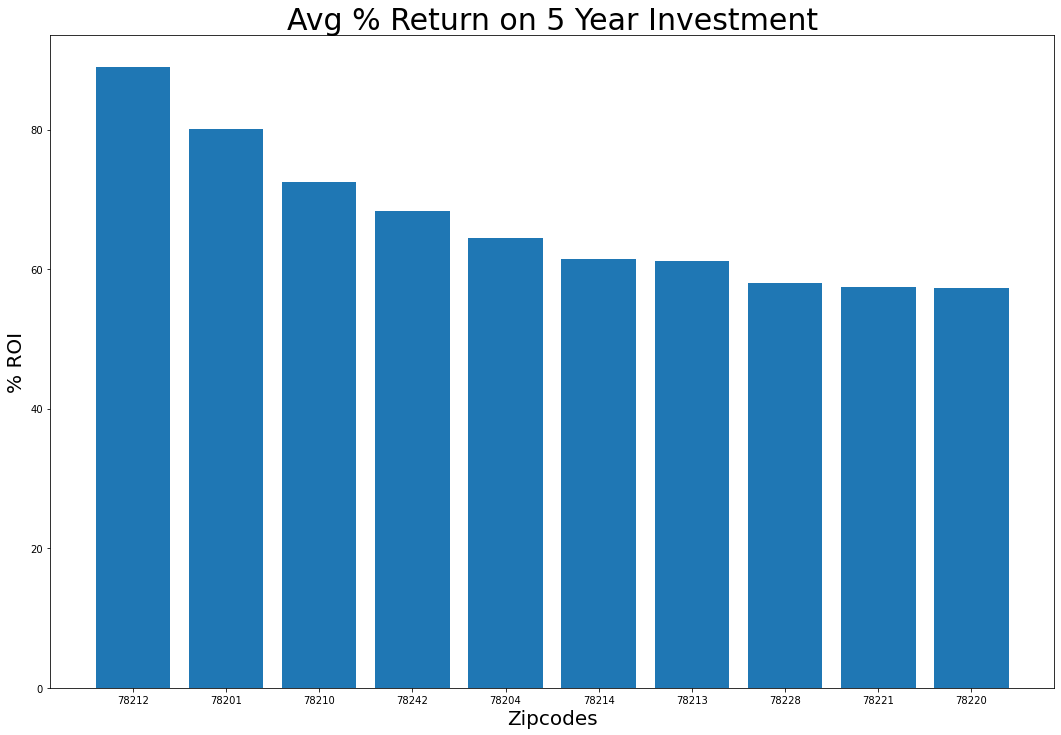

In [42]:
# Calculate 5 year ROI and keep top 10
roi_df['roi_5year'] = ((roi_df['2018-04'] - roi_df['2013-04'])/(roi_df['2013-04'])*100)
sa_5_year_roi = roi_df.sort_values('roi_5year',ascending=False).head(10)
sa_5_year_roi['RegionName'] = sa_5_year_roi['RegionName'].astype(str)

#Plot
fig,ax=plt.subplots(figsize=(18,12))


ax.bar(x= sa_5_year_roi['RegionName'], height=sa_5_year_roi['roi_5year'], color='tab:blue')

ax.set_ylabel('% ROI',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on 5 Year Investment',fontsize='30');

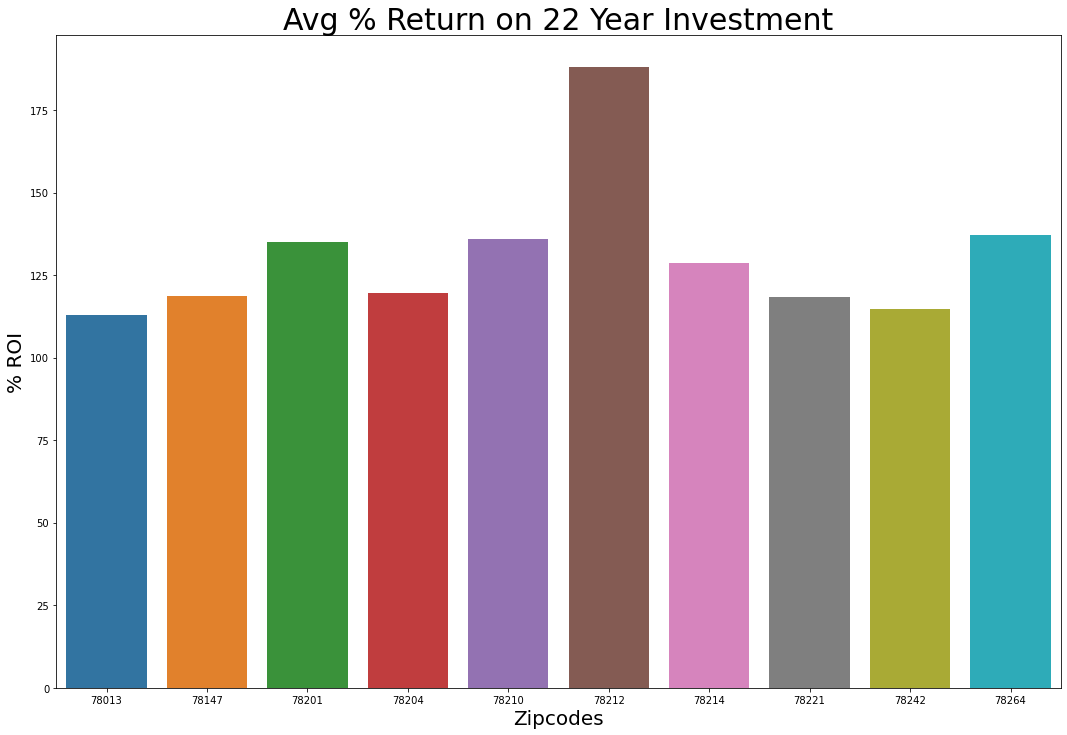

In [9]:
# Calculate 22 year ROI and keep top 10
roi_df['roi_22year'] = ((roi_df['2018-04'] - roi_df['1996-04'])/(roi_df['1996-04'])*100)
sa_22_year_roi = roi_df.sort_values('roi_22year',ascending=False).head(10)

#Plot
fig,ax=plt.subplots(figsize=(18,12))
x_labels = [str(x) for x in sa_22_year_roi['RegionName']]
sns.barplot(x= sa_22_year_roi['RegionName'], y=sa_22_year_roi['roi_22year'])

ax.set_ylabel('% ROI',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on 22 Year Investment',fontsize='30');

In [10]:
sa_22_year_roi

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi_5year,roi_22year
2944,92308,78212,San Antonio,TX,San Antonio,Bexar,2945,79500.0,79800.0,80100.0,...,204300,206300,211100,217200,222300,225800,228100,229100,89.026403,188.176101
8481,92360,78264,San Antonio,TX,San Antonio,Bexar,8482,60800.0,60700.0,60600.0,...,135500,138400,139300,139700,141300,143200,143900,144100,48.556701,137.006579
2362,92306,78210,San Antonio,TX,San Antonio,Bexar,2363,50600.0,50500.0,50500.0,...,105600,107800,108800,110000,111900,114500,117200,119400,72.543353,135.968379
1127,92297,78201,San Antonio,TX,San Antonio,Bexar,1128,59800.0,59900.0,60100.0,...,134700,135300,136200,137800,139100,139800,140300,140600,80.025608,135.117057
5455,92310,78214,San Antonio,TX,San Antonio,Bexar,5456,47000.0,47000.0,47000.0,...,99000,99100,99900,101900,103200,104600,106100,107500,61.411411,128.723404
7776,92300,78204,San Antonio,TX,San Antonio,Bexar,7777,47300.0,47300.0,47400.0,...,91500,94000,96600,97900,98200,99300,101600,103900,64.398734,119.661734
13442,92283,78147,Poth,TX,San Antonio,Wilson,13443,63800.0,63800.0,63900.0,...,138000,139300,140700,141400,140900,139900,139400,139500,43.518519,118.652038
3016,92317,78221,San Antonio,TX,San Antonio,Bexar,3017,53600.0,53600.0,53500.0,...,109700,110000,110600,111900,113800,115200,116200,117000,57.469717,118.283582
4609,92338,78242,San Antonio,TX,San Antonio,Bexar,4610,47700.0,47900.0,48100.0,...,89000,89600,90100,92000,94800,97400,100100,102500,68.308703,114.884696
10215,92203,78013,Comfort,TX,San Antonio,Kendall,10216,106600.0,106400.0,106300.0,...,193700,196700,202900,209400,212000,214700,221200,227100,33.196481,113.039400


### Reshape from Wide to Long Format

In [11]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], format = '%Y-%m')
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [12]:
# Get average of San Antonio metro zipcodes
satx_df_melted = melt_data(sa_df)
satx_df_melted.head()

,value
time,
1996-04-01,118574.358974
1996-05-01,118574.358974
1996-06-01,118598.717949
1996-07-01,118637.179487
1996-08-01,118705.128205


In [13]:
# Get average of all US zipcodes
df_melted = melt_data(df)
df_melted.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


### San Antonio vs US Median Home Prices

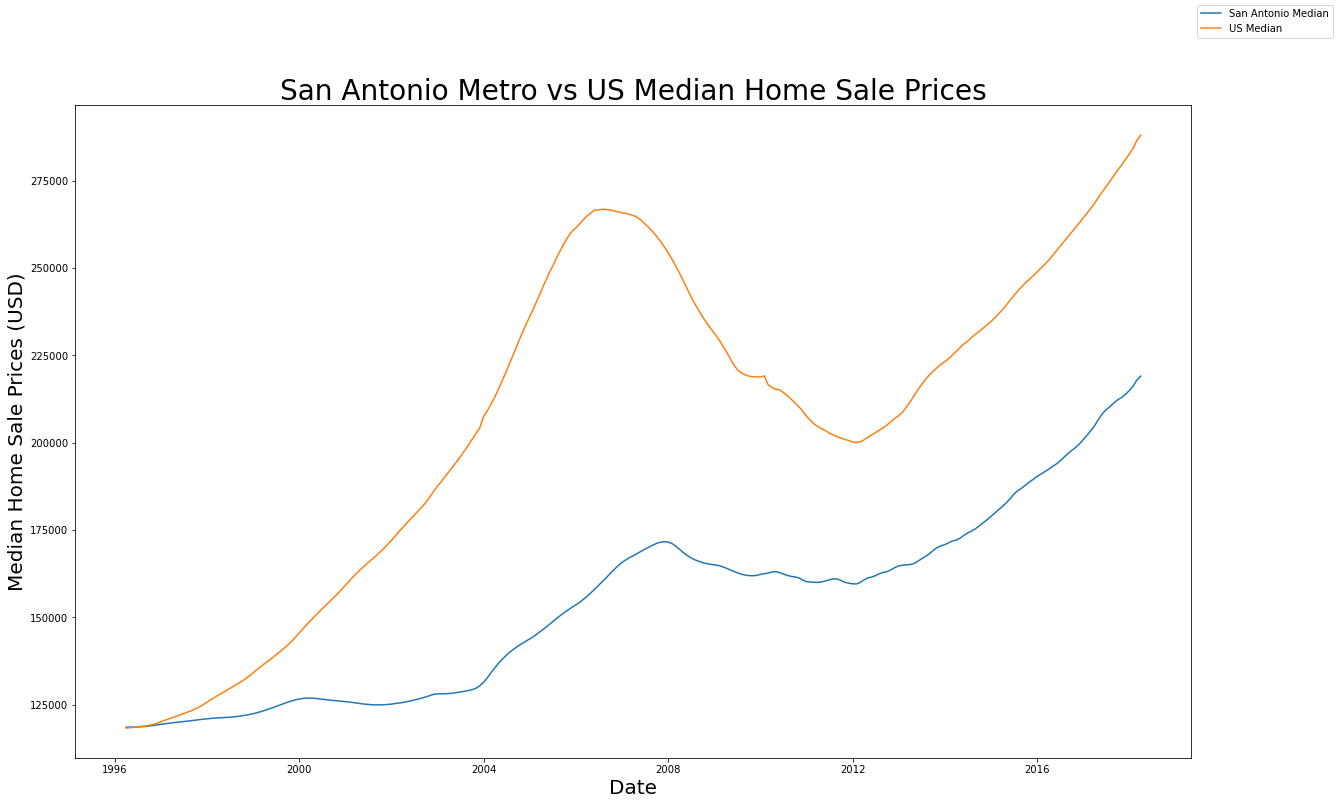

In [14]:
# Plot home value time series for all zip codes averaged

# Define figure
ax = plt.figure(figsize=(20,12))

# Plot
plt.plot(satx_df_melted, label = 'San Antonio Median')
plt.plot(df_melted, label = 'US Median')

# Title, x & y labels
plt.title('San Antonio Metro vs US Median Home Sale Prices', fontsize=28)
plt.ylabel('Median Home Sale Prices (USD)', fontsize=20)
plt.xlabel('Date', fontsize=20)
ax.legend()

plt.show()

In [15]:
#Create dataframe for new melted data
def melt_df(df):
    merged = []
    for zipcode in df.RegionName:
        melted = melt_data(df.loc[df['RegionName'] == zipcode])
        row = df.loc[df['RegionName'] == zipcode].iloc[:,:6]
        rows = pd.concat([row]*len(melted), ignore_index=True)
        merge = pd.concat([rows, melted.reset_index()], axis= 1)
        merged.append(merge)
    melted_df = pd.concat(merged)
    return melted_df

In [16]:
satx_df = melt_df(sa_df)
satx_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,time,value
0,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-04-01,123900.0
1,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-05-01,123900.0
2,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-06-01,123800.0
3,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-07-01,123800.0
4,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-08-01,123800.0


In [17]:
model_df = satx_df.drop(['RegionID','City','State','Metro','CountyName'], axis ='columns').set_index('time')
model_df.head()

,RegionName,value
time,,
1996-04-01,78130,123900.0
1996-05-01,78130,123900.0
1996-06-01,78130,123800.0
1996-07-01,78130,123800.0
1996-08-01,78130,123800.0


In [18]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20670 entries, 1996-04-01 to 2018-04-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  20670 non-null  int64  
 1   value       20670 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 484.5 KB


### Average Housing Prices In San Antonio Metro Over Time

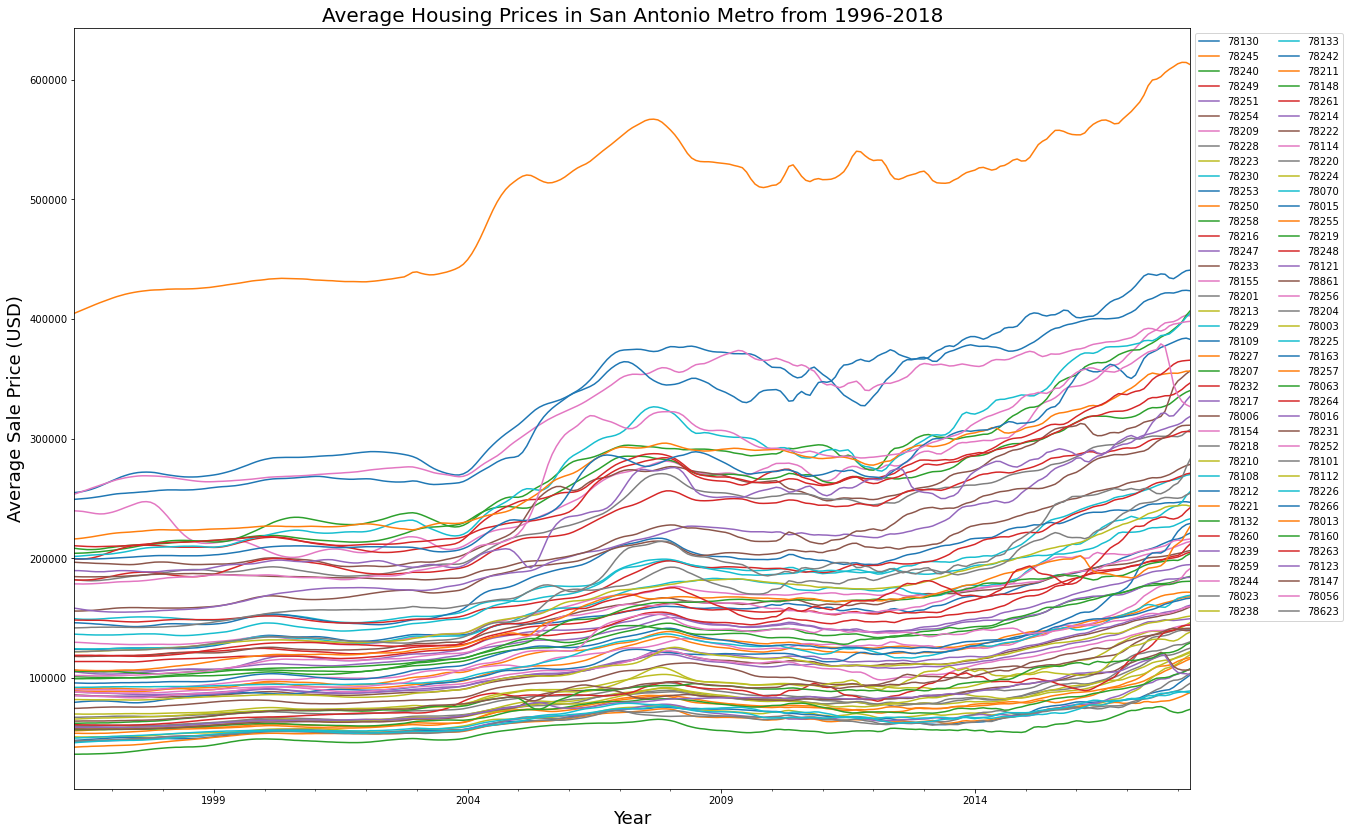

In [19]:
#plot the values grouped by zipcode
plt.figure(figsize=(20,14))
for zipcode in model_df.RegionName.unique():
    model_df.loc[model_df['RegionName'] == zipcode].value.plot(label=zipcode)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=2)

plt.xlabel("Year", fontsize = 18)
plt.ylabel("Average Sale Price (USD)", fontsize=18)
plt.title('Average Housing Prices in San Antonio Metro from 1996-2018', fontsize = 20)
plt.show();


In [20]:
model_df.loc[model_df['value'] >= 450000]

,RegionName,value
time,,
2004-02-01,78257,454600.0
2004-03-01,78257,460700.0
2004-04-01,78257,467700.0
2004-05-01,78257,475400.0
2004-06-01,78257,483400.0
...,...,...
2017-12-01,78257,611000.0
2018-01-01,78257,613400.0
2018-02-01,78257,614600.0


In [21]:
satx_df_melted

,value
time,
1996-04-01,118574.358974
1996-05-01,118574.358974
1996-06-01,118598.717949
1996-07-01,118637.179487
1996-08-01,118705.128205
...,...
2017-12-01,213852.564103
2018-01-01,214932.051282
2018-02-01,216239.743590


## ARIMA Modeling

### Seasonal Decomposition

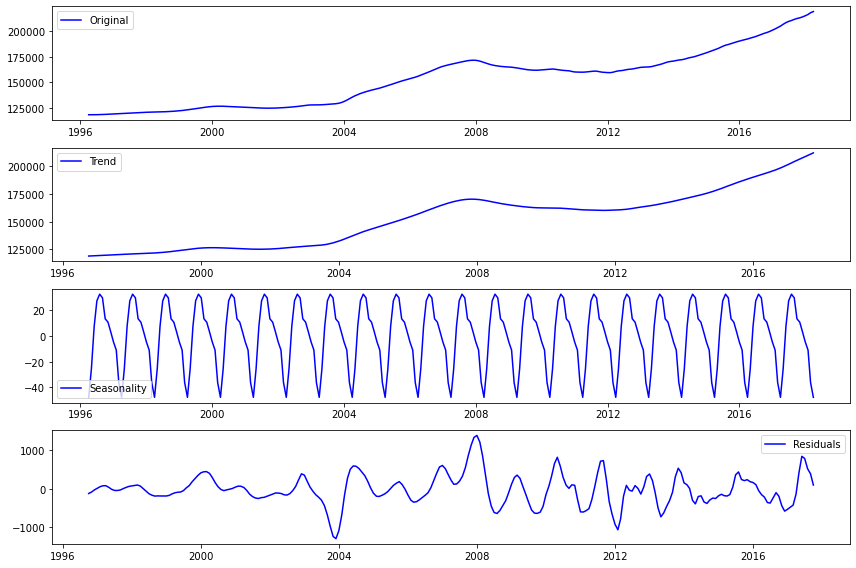

In [22]:
decomposition = sm.tsa.seasonal_decompose(satx_df_melted, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(satx_df_melted, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Stationarity Check

In [23]:
def stationarity_check(TS):
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

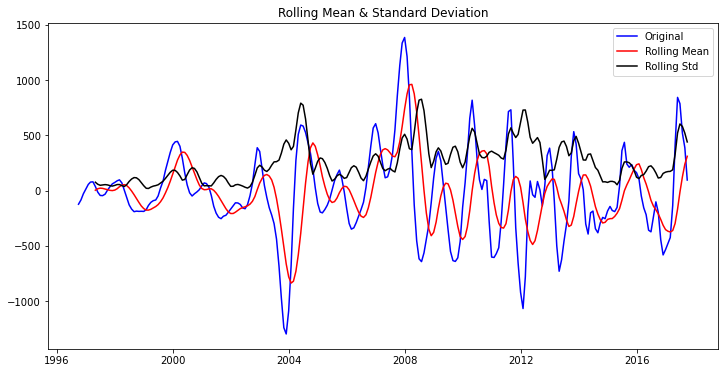

Results of Dickey-Fuller Test: 

Test Statistic                  -4.040103
p-value                          0.001214
#Lags Used                      13.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [25]:
stationarity_check(ts_log_decompose)

### Autocorrelation and Partial Autocorrelation

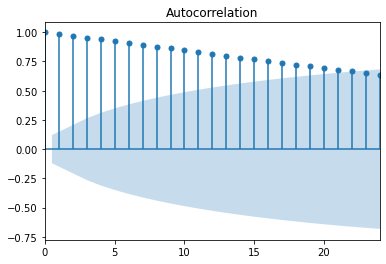

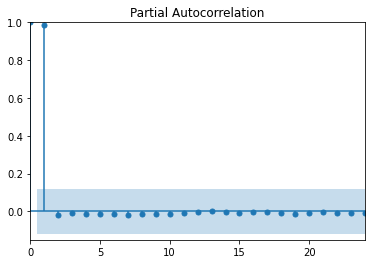

In [26]:
plot_acf(satx_df_melted); plt.xlim(0,24); plt.show()
plot_pacf(satx_df_melted); plt.xlim(0,24); plt.ylim(-0.15,1);plt.show()

<AxesSubplot:xlabel='time'>

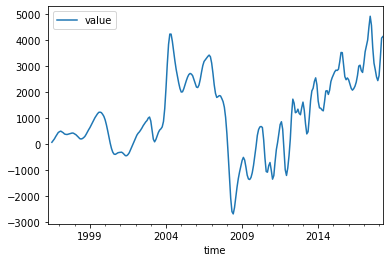

In [27]:
satx_df_melted.diff(periods=3).plot()

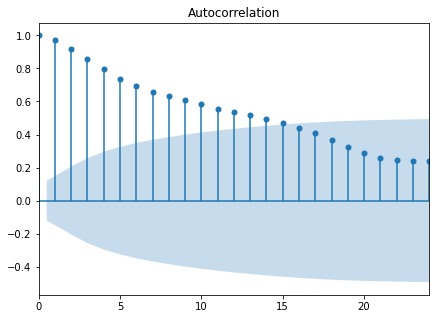

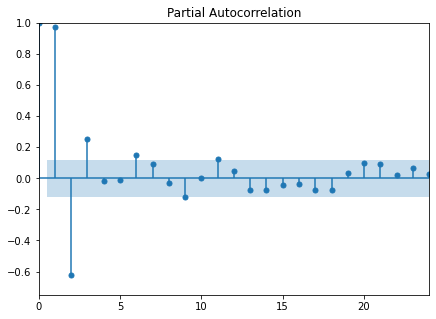

In [28]:
rcParams['figure.figsize']=7,5
plot_acf(satx_df_melted.diff(periods=3).bfill()); plt.xlim(0,24); plt.show()
plot_pacf(satx_df_melted.diff(periods=3).bfill()); plt.xlim(0,24); plt.ylim(-0.75,1);plt.show()

In [29]:
model_df

,RegionName,value
time,,
1996-04-01,78130,123900.0
1996-05-01,78130,123900.0
1996-06-01,78130,123800.0
1996-07-01,78130,123800.0
1996-08-01,78130,123800.0
...,...,...
2017-12-01,78623,260900.0
2018-01-01,78623,262700.0
2018-02-01,78623,267100.0


### Gridsearch for SARIMAX Model

In [30]:
# Define function to create individual time series by zipcode
def zipcode_ts(df, zipcode):
    '''
    Input:
        df : dataframe of Zillow housing data.
        zipcode : list of zip codes to iterate through.
    '''
    zipcode_df = df[df['RegionName'] == zipcode]
    zipcode_df = zipcode_df.drop(columns = 'RegionName', axis=1)
    return zipcode_df 

In [31]:
olmos_park = zipcode_ts(model_df, 78212)
la_heights = zipcode_ts(model_df, 78201)
highland_park = zipcode_ts(model_df, 78210)
garden_ridge = zipcode_ts(model_df, 78266)
zip_df = [olmos_park, la_heights, highland_park, garden_ridge]
zip_list = np.array([78212, 78201, 78210, 78266])

In [47]:
# for z in model_df['RegionName'].unique():
#     training_data = zipcode_ts(model_df, z)
#     display(training_data)
#     break

,value
time,
1996-04-01,123900.0
1996-05-01,123900.0
1996-06-01,123800.0
1996-07-01,123800.0
1996-08-01,123800.0
...,...
2017-12-01,215500.0
2018-01-01,216000.0
2018-02-01,217200.0


In [32]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [33]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for df, name in zip(zip_df, zip_list):
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([name, comb, combs, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(comb, combs, output.aic))
            except:
                continue


Result for 78212 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 6924.355806157928
Result for 78212 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 6454.585242767549
Result for 78212 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 5448.910892909895
Result for 78212 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 5201.921775007213
Result for 78212 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5341.934561613563
Result for 78212 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 5321.594474859981
Result for 78212 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 5004.457510263623
Result for 78212 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4987.730612700161
Result for 78212 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 6708.10650224378
Result for 78212 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 6360.004205727264
Result for 78212 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 5264.383461640405
Result for 78212 ARIMA (0, 0, 1) 

Result for 78201 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3782.7954372717763
Result for 78201 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3726.802619848265
Result for 78201 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3620.925005291875
Result for 78201 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 4231.663336898397
Result for 78201 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4186.510705213483
Result for 78201 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 4165.118327265444
Result for 78201 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 3923.0496073316085
Result for 78201 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4048.4889412564057
Result for 78201 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4169.901416411127
Result for 78201 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3851.4951545478357
Result for 78201 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4079.5692890362443
Result for 78201 ARIMA (1, 

Result for 78210 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3587.0845576400006
Result for 78210 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3348.669941517516
Result for 78210 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3489.758050210645
Result for 78210 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3468.1826195071417
Result for 78210 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3415.0307989854373
Result for 78210 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3346.301679319396
Result for 78266 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 7464.304753059321
Result for 78266 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 6963.495413669285
Result for 78266 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 5602.01775784734
Result for 78266 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 5347.751558930421
Result for 78266 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5533.590893169311
Result for 78266 ARIMA (0, 0, 

In [34]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['name', 'pdq', 'pdqs', 'aic'])
ans_df

,name,pdq,pdqs,aic
0,78212,"(0, 0, 0)","(0, 0, 0, 12)",6924.355806
1,78212,"(0, 0, 0)","(0, 0, 1, 12)",6454.585243
2,78212,"(0, 0, 0)","(0, 1, 0, 12)",5448.910893
3,78212,"(0, 0, 0)","(0, 1, 1, 12)",5201.921775
4,78212,"(0, 0, 0)","(1, 0, 0, 12)",5341.934562
...,...,...,...,...
251,78266,"(1, 1, 1)","(0, 1, 1, 12)",4144.354284
252,78266,"(1, 1, 1)","(1, 0, 0, 12)",4165.076942
253,78266,"(1, 1, 1)","(1, 0, 1, 12)",4131.966099
254,78266,"(1, 1, 1)","(1, 1, 0, 12)",4184.289240


In [35]:
#Return the best set of parameters based on AIC
best_para = ans_df.loc[ans_df.groupby("name")["aic"].idxmin()]
best_para

,name,pdq,pdqs,aic
123,78201,"(1, 1, 1)","(0, 1, 1, 12)",3350.412566
191,78210,"(1, 1, 1)","(1, 1, 1, 12)",3346.301679
59,78212,"(1, 1, 1)","(0, 1, 1, 12)",3591.289386
255,78266,"(1, 1, 1)","(1, 1, 1, 12)",4122.332422


### Best Parameters SARIMAX Model

In [36]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(olmos_park, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8026      0.022     35.734      0.000       0.759       0.847
ma.L1          0.4601      0.018     26.085      0.000       0.426       0.495
ar.S.L12      -0.8559      0.067    -12.801      0.000      -0.987      -0.725
ma.S.L12      -0.0772      0.032     -2.422      0.015      -0.140      -0.015
sigma2      2.073e+05   1.24e+04     16.653      0.000    1.83e+05    2.32e+05


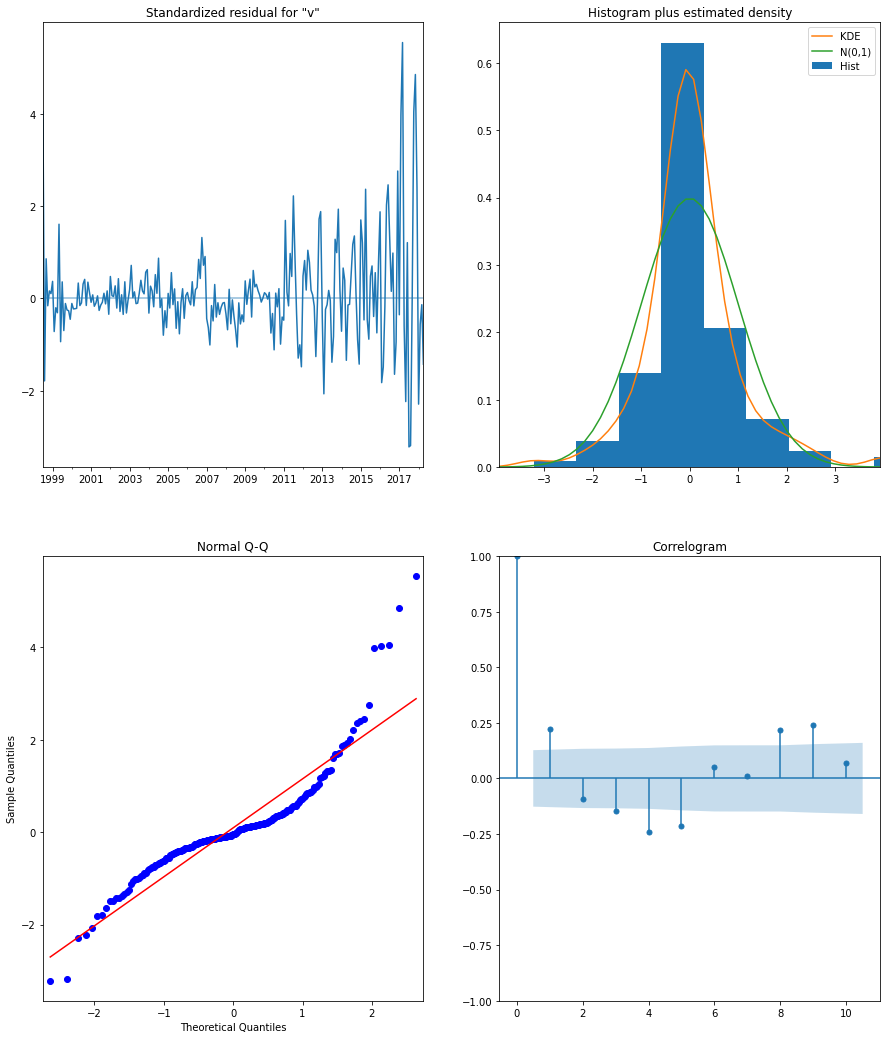

In [37]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## Step 6: Interpreting Results

In [48]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [49]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = model_df['2017-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House prices')
plt.legend()

plt.show()

AssertionError: <class 'numpy.ndarray'>

In [ ]:
# Get the real and predicted values
CO2_forecasted = pred.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Step 6: Interpreting Results